In [34]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/AdvertisingCleaned"
AdData = pd.read_csv(url)
AdData.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [35]:
del AdData['Unnamed: 0']

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [37]:
AdData['TV_Square'] = AdData.TV ** 2
AdData['TV_Cube'] = AdData.TV ** 3
AdData['Log'] = np.log(AdData.TV +1 )
AdData
AdData.head(2)

,TV,Radio,Newspaper,Sales,TV_Square,TV_Cube,Log
0,230.1,37.8,69.2,22.1,52946.01,1.218288e+07,5.442851
1,44.5,39.3,45.1,10.4,1980.25,8.812112e+04,3.817712


## Now let's build a regression line (Import, Instantiate, Fit)

In [38]:
from sklearn.linear_model import LinearRegression  #import

In [39]:
linreg = LinearRegression() #Instantiate

In [40]:
X_Line = AdData[['TV']]
X_Quad = AdData[['TV', 'TV_Square']]
X_Cube = AdData[['TV', 'TV_Square','TV_Cube']]
X_log = AdData[['Log']]
y = AdData['Sales']

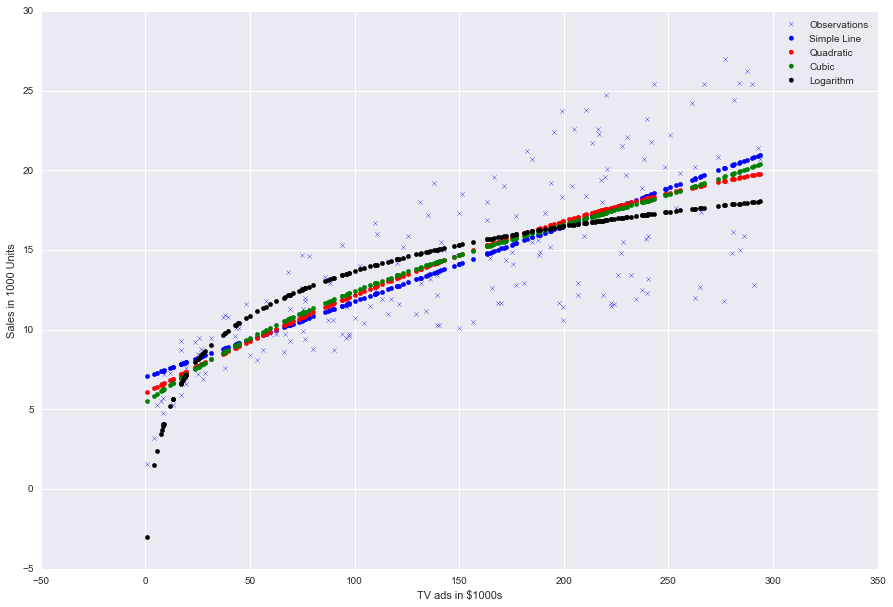

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(AdData['TV'], AdData['Sales'], marker ="x", label = 'Observations')

#Simple Line
linreg.fit(X_Line , y)
Predicted_Values_line = linreg.predict(X_Line)
plt.scatter(AdData['TV'], Predicted_Values_line, color = 'b', label = 'Simple Line')

#Quadratic Function
linreg.fit(X_Quad  , y)
Predicted_Values_Quad  = linreg.predict(X_Quad )
plt.scatter(AdData['TV'], Predicted_Values_Quad,  color = 'r', label = 'Quadratic')


#Cubic Function
linreg.fit(X_Cube  , y)
Predicted_Values_Cube  = linreg.predict(X_Cube )
plt.scatter(AdData['TV'], Predicted_Values_Cube,  color = 'g', label = 'Cubic')

#Logarithmic Function
linreg.fit(X_log   , y)
Predicted_Values_Log  = linreg.predict(X_log  )
plt.scatter(AdData['TV'], Predicted_Values_Log,  color = 'k', label = 'Logarithm')

plt.xlabel("TV ads in $1000s")
plt.ylabel("Sales in 1000 Units")
plt.legend()
plt.show()


#### Let's import data once again and only use our original data

In [42]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/AdvertisingCleaned"
AdData = pd.read_csv(url)
del AdData['Unnamed: 0']
AdData.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


#### Let's start with running a regression line on all variables

**Here is a handy way to deal with all variables simultanously**

In [43]:
ListOfAllVariables = AdData.columns.values
print(ListOfAllVariables)
print(ListOfAllVariables[0:3])

['TV' 'Radio' 'Newspaper' 'Sales']
['TV' 'Radio' 'Newspaper']


In [44]:
X = AdData[ListOfAllVariables[0:3]]
y= AdData['Sales']

In [45]:
linreg.fit(X,y)     #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Let's print intercept and slope
print(linreg.intercept_)
print(linreg.coef_)

2.95230856712
[ 0.04569034  0.18855047 -0.00117766]


In [47]:
print("Sales_Hat = %f + %f * TV + %f * Radio %f * Newspaper" 
      %(linreg.intercept_, linreg.coef_[0], linreg.coef_[1], linreg.coef_[2]))


Sales_Hat = 2.952309 + 0.045690 * TV + 0.188550 * Radio -0.001178 * Newspaper


#### In our today's lecture we learned that we do need to check p-values to make sure our regression coefficients are significant

In [48]:
from sklearn import feature_selection
pvals = feature_selection.f_regression(X,y)[1] #That's how we extract p-values
print(pvals)

[  1.28688630e-41   5.98974315e-19   1.88449153e-03]


** Unfortunately, sometimes p-values from feature_selection libraray are not reliable **

#### When you have too many varaibles, it's hard to know which p-value corresponds to which varaible. One way to deal with it is to "zip" name of variables and pvalues 

In [49]:
zip(ListOfAllVariables[0:3],pvals)

[('TV', 1.2868863011306236e-41),
 ('Radio', 5.9897431525461289e-19),
 ('Newspaper', 0.0018844915271769326)]

(e-41) means 10 to the power of -41, in other words forty one **zeros** after decimal points. 'TV' and 'Radio' are very significant **of course if we could trust these p-values**. 'Newspaper' is also significant but for two reasons we better drop it from our dataset:

First, look at the magnitude of the variable. It's effect is very close to zero. Second, by looking at corr() matrix we used last time we found that 'Newspaper' is linearly correlated with some of the other variables. In essense, if we  would like to use the model for its interpretability, we shall not keep both 'Newspaper' and 'Radio' simoltanously. 'Radio' is a better predictor and has a lower p-value - so we keep that variable.  

** Unfortunately, there is something wrong with the way  p-values are computed in feature_selection library**. 

## How much of the variability of our model was captured by our linear model?

This is the definition of **R_Squared**. Let's first calculate it = this is the hard way!

In [50]:
RSS = sum((y-linreg.predict(X))**2) #Residual sum square
TSS = sum((y-y.mean())**2)
R_Squared = 1 - float(RSS)/TSS
print(R_Squared)

0.895391718302


Now let's find R_Squared using a python function

In [51]:
linreg.score(X,y)

0.89539171830247521

## There was one way to run regression lines and see everything at the same place and more importantly get reliable p-values. We technically use R commands in Python! Sorry Python!

In [52]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ X', data=AdData).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           8.35e-95
Time:                        22:53:56   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
X[0]           0.0457      0.001     32.293      0.000         0.043     0.048
X[1]           0.1886      0.009     21.772      0.000         0.171     0.206
X[2]          -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(lm.pvalues) #P-values these are reliable p-values
print(lm.params) #intercept + ceofficients
print(lm.rsquared)

Intercept    3.417928e-17
X[0]         5.715535e-80
X[1]         5.535441e-54
X[2]         8.517770e-01
dtype: float64
Intercept    2.952309
X[0]         0.045690
X[1]         0.188550
X[2]        -0.001178
dtype: float64
0.895391718302


In [54]:
print("Coefficients:" , zip(ListOfAllVariables[0:3], lm.params[1:4]))
print("P-Vales: ", zip(ListOfAllVariables[0:3], lm.pvalues[1:4]))

('Coefficients:', [('TV', 0.045690341924579062), ('Radio', 0.18855046885810567), ('Newspaper', -0.0011776635581810108)])
('P-Vales: ', [('TV', 5.7155352150916457e-80), ('Radio', 5.5354408731511653e-54), ('Newspaper', 0.85177703085886469)])


# Now let's go back to our ad buisness and use Radio and TV as input variables. 

In [55]:
X = AdData[['TV','Radio']]
y= AdData['Sales']
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

2.93147585094
[ 0.04568137  0.18799199]


Our linear regression model is:

Sales_hat = 2.93147 + 0.045681*TV + 0.18799*Radio

In our data set - keeping everything else fixed - every 1000 dollars expenditure on TV ads on average contributed to 45.68 units of Sales and every 1000 dollars expenditure on Radio, contributed 188 units to Sales. Does it mean Radio ads contribute to Sales more than TV ads? (DON'T JUMP INTO CONCLUSIONS THAT FAST)

Again, please be careful, we are not suggesting causation. Moreover, we assumed everything is fixed when interpreted TV and Radio ads. In reality, companies who spend on TV ads tend to also spend on other means of ad. 

First of all, we just observed that in comparison to TV ads, only little has been spent on Radio ads. Median expenditure on TV ads is 7 times more than Radio ads. Second, may be only those companies who spend a lot in TV are interested in spending money in Radio ads. Let's explore it with a scatterplot. 

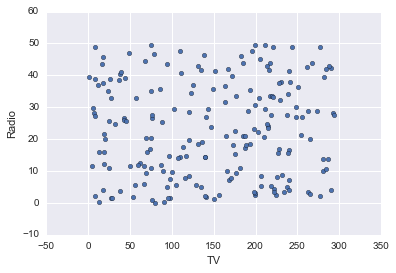

In [56]:
AdData.plot(kind= 'scatter', x = 'TV',y = 'Radio')
plt.show()

Fortunately, the scatter plot does not suggest that much of association between TV ads and Radio ads. That's good! Actually, corr() matrix suggested that there were no linear relationship. 

So, how can we interpret the result?

May be there is synergy between TV and Radio. In other words, may be, Radio ads are effective only if we have spent enough in TV and visa-versa. In marketing, it is being said that an ad is effective if a potential customer is exposed to it at least 5 times. So, synergy effect is yet to be tested! This is what we are going to explore now. 

#### Now let's explore the synergy effect

We first need to define a new variable that captures the synergy effect. Let's call our new variable "Radio_TV". This variable is Radio*TV

In [57]:
AdData['Radio_TV'] = AdData['Radio'] * AdData['TV']
AdData.head(2)

,TV,Radio,Newspaper,Sales,Radio_TV
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85


In [58]:
X = AdData[['TV','Radio','Radio_TV']]
y = AdData['Sales']

In [59]:
linreg.fit(X,y)
lm = smf.ols(formula='y ~ X', data=AdData).fit()
R_Squared = linreg.score(X,y)
print('Intercept =' ,linreg.intercept_)
print('coefficients =' ,linreg.coef_)
print('P-Values = ',lm.pvalues)
print('R_Squared = ', R_Squared)

('Intercept =', 6.7576750919729793)
('coefficients =', array([ 0.01904597,  0.02759604,  0.00109608]))
('P-Values = ', Intercept    2.246821e-68
X[0]         3.106794e-27
X[1]         2.302880e-03
X[2]         2.484512e-51
dtype: float64)
('R_Squared = ', 0.96764530289443418)


Look how significant our coefficients are! Our new regression line is:

Sales_hat = 6.7576 + 0.01904597 * TV + 0.02759604 * Radio + 0.0011 * Radio * TV

Now, let's interpret our results:

The coefficient estimates suggest that an increase in TV advertising of 1000 dollars is associated with increased sales of: (0.019 + 0.0011 * Radio) * 1000 = 19 + 1.1 Radio  units. In other words, if you have already spent 2000 dollars in Radio Ads, the effect of adding  1000 dollars in TV ads is 19+1.1 * 2 = 21.2 units. The effect would have been significantly more if you had invested 10000 dollars in radio. In that case, additional 1000 dollars expenditure on TV ads contributes  to additional 19 + 1.1 * 10 = 30 units of sale.

Also, for radio, an increase in radio advertising of 1000 dollars will be associated with increase in sales of (0.02759 + 0.0011 * TV) * 1000 = 27.5 + 1.1 * TV . 

Don't forget that these arguments are only valid within the range of observed data. 